# Imports

In [1]:
import sys
from google.colab import drive

# Install Requirements

In [2]:
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/M.Sc DS/Semesters/Semester 4/NLP/Final Project/Run Models/run_project'
!pip install -r requirements.txt
sys.path.append('/content/gdrive/MyDrive/M.Sc DS/Semesters/Semester 4/NLP/Final Project/Run Models/run_project/src')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/M.Sc DS/Semesters/Semester 4/NLP/Final Project/Run Models/run_project
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!python -m spacy download en

⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 8.1 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [4]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# Run Preprocessing

In [5]:
from src.data_processing import prep_pipeline as preprocessing_main

In [6]:
preprocessing_main()

580323060533764097
dev


  0%|          | 0/38 [00:00<?, ?it/s]/content/gdrive/MyDrive/M.Sc DS/Semesters/Semester 4/NLP/Final Project/Run Models/run_project/src/preprocessing/transform_feature_dict.py:59: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  branch_rep = np.asarray(branch_rep)
100%|██████████| 38/38 [14:05<00:00, 22.24s/it]


Writing dataset dev


100%|██████████| 966/966 [00:00<00:00, 55381.32it/s]


train


100%|██████████| 327/327 [48:23<00:00,  8.88s/it]


Writing dataset train


100%|██████████| 3560/3560 [00:00<00:00, 62122.84it/s]


test


100%|██████████| 81/81 [17:23<00:00, 12.88s/it]


Writing dataset test


100%|██████████| 1384/1384 [00:00<00:00, 64298.32it/s]


# Run Model

In [5]:
from src.run_model import main as model_main

## Baseline - BERT

Train examples: 5217
Validation examples: 1485


/usr/local/lib/python3.7/dist-packages/pytorch_pretrained_bert/optimization.py:275: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at  ../torch/csrc/utils/python_arg_parser.cpp:1174.)
  next_m.mul_(beta1).add_(1 - beta1, grad)


Epoch: 0
Train- loss: 0.01379406573756393, accuracy: 0.6243051562200498
Validation- loss: 0.22659542713114933, accuracy: 0.7851851851851852, F1: 0.3016964200780036
(Best loss: 0.22659542713114933 Best accuracy: 0.7851851851851852, Best F1: 0.3016964200780036)
Test- accuracy: 0.8155446086480569, F1: 0.2698759827261654
Epoch: 1
Train- loss: 0.01279226454504582, accuracy: 0.706728004600345
Validation- loss: 0.20480666729654862, accuracy: 0.7919191919191919, F1: 0.32420946727702604
(Best loss: 0.20480666729654862 Best accuracy: 0.7919191919191919, Best F1: 0.32420946727702604)
Test- accuracy: 0.8248494800218938, F1: 0.30589839999145113


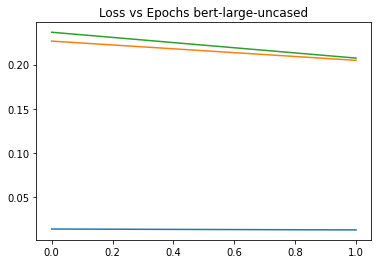

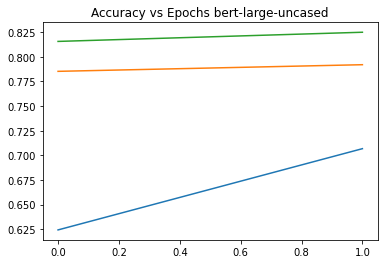

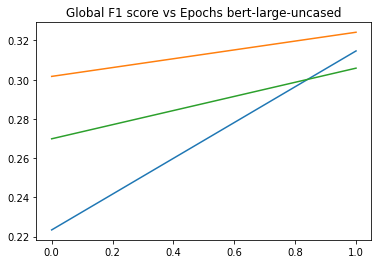

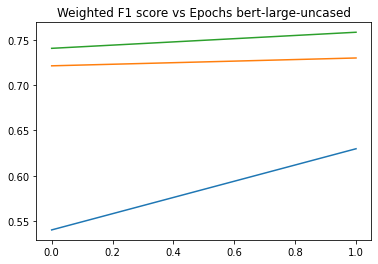

In [6]:
model_main(model='baseline')

## GPT2

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Train examples: 5217
Validation examples: 1485
Epoch: 0
Train- loss: 0.012620697822071984, accuracy: 0.7005942112325091
Validation- loss: 0.5762020254048315, accuracy: 0.09225589225589226, F1: 0.13719951257339094
(Best loss: 0.5762020254048315 Best accuracy: 0.09225589225589226, Best F1: 0.13719951257339094)
Test- accuracy: 0.1056376573617953, F1: 0.1548307728840839
Epoch: 1
Train- loss: 0.011518273594333142, accuracy: 0.706728004600345
Validation- loss: 0.29667334037495735, accuracy: 0.3569023569023569, F1: 0.3147389651807804
(Best loss: 0.29667334037495735 Best accuracy: 0.3569023569023569, Best F1: 0.3147389651807804)
Test- accuracy: 0.4126984126984127, F1: 0.3274997082345714


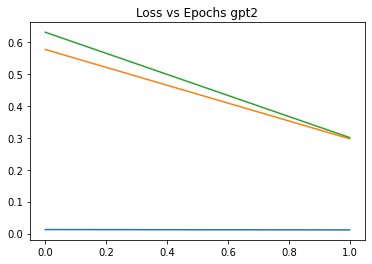

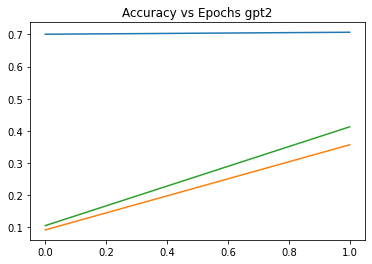

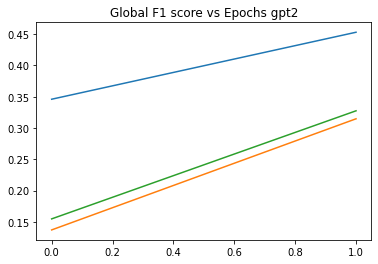

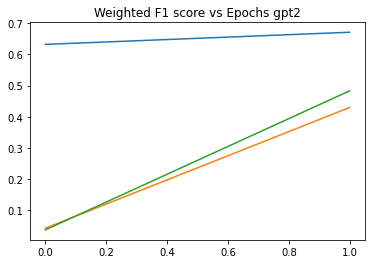

In [7]:
model_main(model='gpt2')

## RoBERTa

100%|██████████| 1425941629/1425941629 [00:32<00:00, 43534974.61B/s]


Train examples: 5217
Validation examples: 1485
Epoch: 0
Train- loss: 0.012841959003323057, accuracy: 0.6979106766340809
Validation- loss: 0.24398156723699035, accuracy: 0.7683501683501683, F1: 0.31303733121525024
(Best loss: 0.24398156723699035 Best accuracy: 0.7683501683501683, Best F1: 0.31303733121525024)
Test- accuracy: 0.8111658456486043, F1: 0.3225397790615182
Epoch: 1
Train- loss: 0.01146389636519349, accuracy: 0.7316465401571784
Validation- loss: 0.2758082187469698, accuracy: 0.6323232323232323, F1: 0.3586372968685422
(Best loss: 0.24398156723699035 Best accuracy: 0.7683501683501683, Best F1: 0.3586372968685422)
Test- accuracy: 0.5807334428024084, F1: 0.34603492639304845


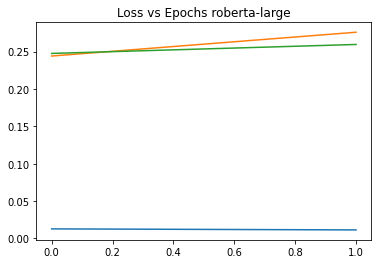

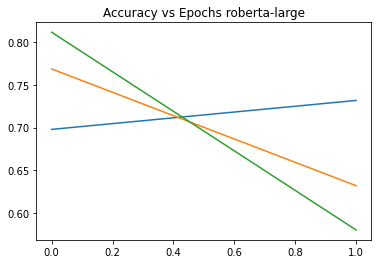

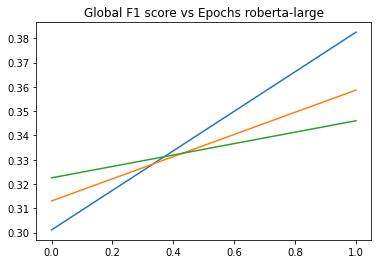

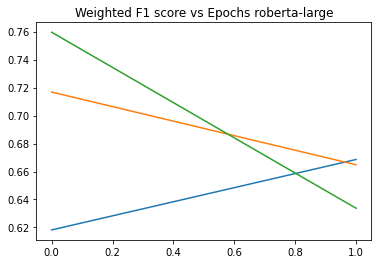

In [8]:
 model_main(model='roberta')

## RoBERTa with features

Train examples: 5217
Validation examples: 1485
Epoch: 0
Train- loss: 0.013335507397626383, accuracy: 0.6804677017442975
Validation- loss: 0.31853212955293586, accuracy: 0.2, F1: 0.1071195312536709
(Best loss: 0.31853212955293586 Best accuracy: 0.2, Best F1: 0.1071195312536709)
Test- accuracy: 0.10673234811165845, F1: 0.05310634834508953
Epoch: 1
Train- loss: 0.01257304190127793, accuracy: 0.7046195131301515
Validation- loss: 0.2712879142179121, accuracy: 0.42828282828282827, F1: 0.19612283204797873
(Best loss: 0.2712879142179121 Best accuracy: 0.42828282828282827, Best F1: 0.19612283204797873)
Test- accuracy: 0.4482758620689655, F1: 0.21030860860524683


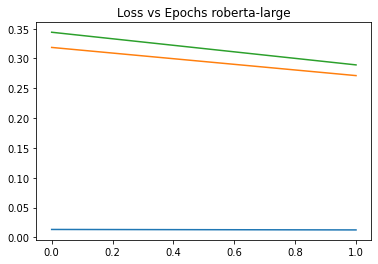

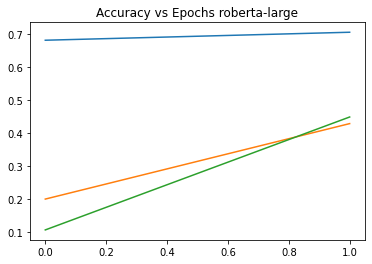

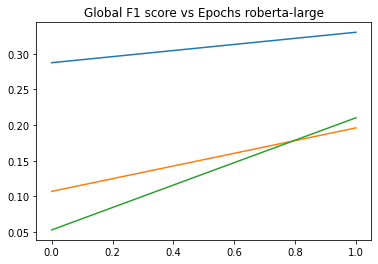

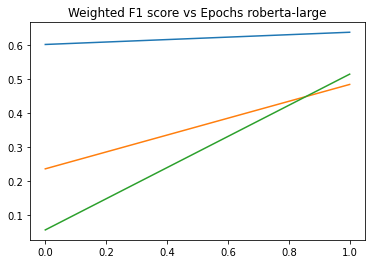

In [9]:
model_main(model='roberta_with_features')